In [1]:
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt
import math
import heapq
from heapq import heappop, heappush
from time import time
%matplotlib inline

In [17]:
from map import Map
from draw import draw
from CBS import CBS
from Solutions import make_path
from astar import Node, distance, SearchTreePQS

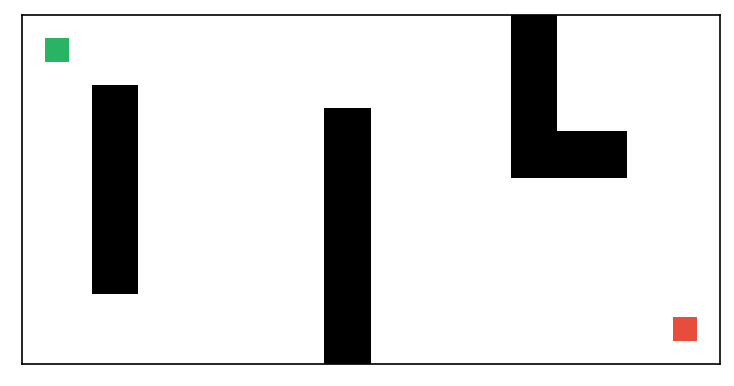

In [3]:
height = 15
width = 30
map_str = '''
. . . . . . . . . . . . . . . . . . . . . # # . . . . . . .  
. . . . . . . . . . . . . . . . . . . . . # # . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . # # . . . . . . . 
. . . # # . . . . . . . . . . . . . . . . # # . . . . . . . 
. . . # # . . . . . . . . # # . . . . . . # # . . . . . . . 
. . . # # . . . . . . . . # # . . . . . . # # # # # . . . . 
. . . # # . . . . . . . . # # . . . . . . # # # # # . . . . 
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . . 
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . . 
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . . 
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . . 
. . . # # . . . . . . . . # # . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . # # . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . # # . . . . . . . . . . . . . . .
. . . . . . . . . . . . . # # . . . . . . . . . . . . . . .
'''

test_map = Map()
test_map.read_from_string(map_str, width, height)
start = Node(1, 1)
goal = Node(13, 28)
draw(test_map, start, goal)

In [24]:
# starts_points = [[0, 0], [0, 1]]
# goal_points = [[2, 2], [10, 1]]
# starts_points = [[0, 1], [0, 0]]
# goal_points = [[10, 1], [2, 2]]
# starts_points = [[0, 0], [0, 1], [1, 0]]
# goal_points = [[2, 2], [10, 1], [1, 3]]
# starts_points = [[0, 0], [0, 1], [1, 0], [1, 1]]
# goal_points = [[2, 2], [10, 1], [1, 3], [10, 10]]
# problem
# starts_points = [[0, 0], [0, 1], [1, 0], [1, 1]]
# goal_points = [[2, 2], [0, 0], [1, 3], [10, 10]]
starts_points = [[0, 0], [0, 1]]
goal_points = [[0, 1], [0, 0]]

In [25]:
sol = CBS(test_map, starts_points, goal_points, distance, SearchTreePQS)

[0 0, 0 1]


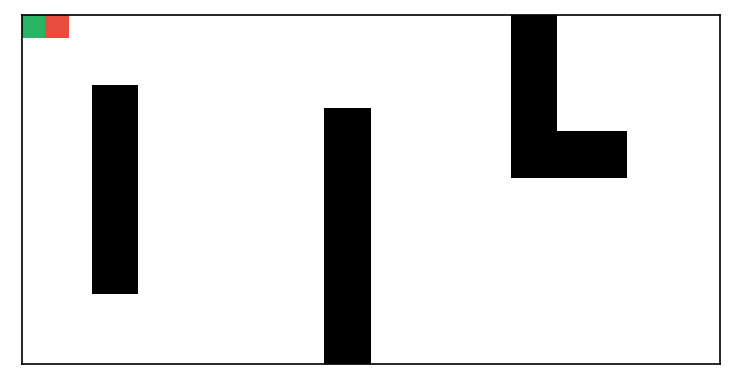

[0 1, 0 0]


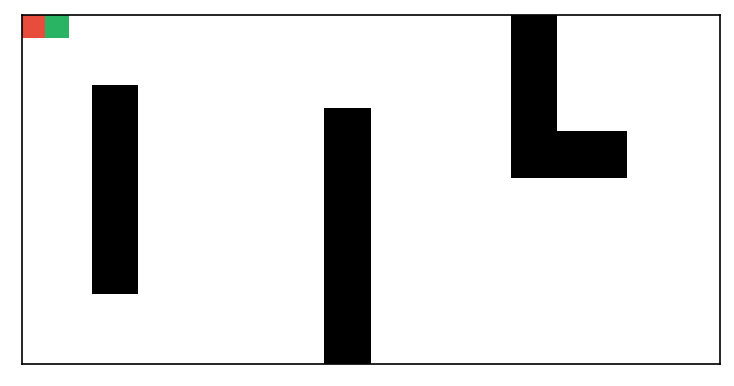

In [26]:
for i in range(len(starts_points)):
    print(sol.get_solution_of_robot(i).get_path())
    draw(test_map, Node(starts_points[i][0], starts_points[i][1]), Node(goal_points[i][0], goal_points[i][1]), sol.get_solution_of_robot(i).get_path())
